# Metrics

Engine of Growth: **Sticky Engine of Growth**

## KPI's
- churn rate = number lost / number at the start of the period
- customers acquisition rate = new customers after the period / number at the start of the period
- rate of compounding = customers acquisition rate minus the churn rate (speed of growth)

### Chrun Rate
Churn rate can be defined either by customer or by product. In either case, it is the **number lost** divided by the **number at the start of the period** and is typically expressed as a percentage (%) of all products/customers and on a monthly or annual basis. So for the customer attrition rate you would **divide the number of customer lost by the total number of customers at the start of the period**.

Churn rate is also the compliment of **Retention rate**. If a company has a 20% attrition rate it will have an 80% retention rate.

### Rate of compounding
The rules that govern the sticky engine of growth are pretty simple: if the rate of new customer acquisition exceeds the churn rate, the product will grow. The speed of growth is determined by what I call the rate of compounding, which is simply the natural growth rate minus the churn rate. Like a bank account that earns compounding interest, having a high rate of compounding will lead to extremely rapid growth—without advertising, viral growth, or publicity stunts.

Ries, Eric. The Lean Startup: How Today's Entrepreneurs Use Continuous Innovation to Create Radically Successful Businesses (p. 211). The Crown Publishing Group. Edição do Kindle. 


### Organizing data

In [1]:
import pymongo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tseries.frequencies import to_offset

%matplotlib inline

cn = pymongo.MongoClient('mongodb://localhost:27017/fashionbot')
db = cn['fashionbot']

cursor = db.users.find({ 'typeform': True }, { '_id': 1, 'email': 1, 'budget': 1, 'typeformID': 1, 'dob': 1, 'name': 1, 'startedAt': 1, 'submitedAt': 1 })

df =  pd.DataFrame(list(cursor))

df.head()

,_id,budget,dob,email,name,startedAt,submitedAt,typeformID
0,5bb442b6382e724314c10c1d,4,2018-09-19,cristianoark23@gmail.com,Dk,2018-09-19 21:43:43,2018-09-19 21:43:43,0b8512a54804c39fe0eb1a2b2d32760d
1,5b9ec43d29d9dd39090e1d90,3,1990-02-07,kayron.scabral@gmail.com,Kayron Cabral,2018-09-24 13:43:49,2018-09-24 13:43:49,58f02f39c4c2b4b993f89918969a9137
2,5bb442b4382e724314c10c1a,1,1995-10-18,emanuelfilipe678@gmail.com,Fkli,2018-09-26 16:46:49,2018-09-26 16:46:49,da189936f361ae933a01723cdedefbb7
3,5bb442b5382e724314c10c1b,2,1998-07-09,ygor_santos22k@hotmail.com,Ygor,2018-09-20 01:21:39,2018-09-20 01:21:39,e64df55870ca4bcf99931818044d8d99
4,5bb442b6382e724314c10c1c,2,1984-04-24,thiagopolitto@yahoo.com.br,Thiago,2018-09-19 22:01:43,2018-09-19 22:01:43,95e25a78cac5a58a8f7ddab1f7ba1e23


In [2]:
cursor = db.clicks.find({}, { '_id': 1, 'user': 1, 'product': 1, 'look': 1, 'event': 1, 'createdAt': 1, 'updatedAt': 1 })

dfClick =  pd.DataFrame(list(cursor))
dfClick.head()

,_id,createdAt,event,look,product,updatedAt,user
0,5bd30ff1d647f074b12d7bbc,2018-10-26 13:00:33.782,LOOK_CLICK,5bb42e3673b91724dbbd2d07,None,2018-10-26 13:00:33.782,5ad651c16ed33100197d4cc6
1,5bd30ff8d647f074b12d9b0f,2018-10-26 13:00:40.757,LOOK_LIKE,5bb42e3673b91724dbbd2d07,None,2018-10-26 13:00:40.757,5ad651c16ed33100197d4cc6
2,5bd30ff9d647f074b12d9d88,2018-10-26 13:00:41.475,LOOK_DISLIKE,5bb42e3673b91724dbbd2d07,None,2018-10-26 13:00:41.475,5ad651c16ed33100197d4cc6
3,5bd30ffed647f074b12db601,2018-10-26 13:00:46.871,PRODUCT_CLICK,None,5b7225fdc3a81800015f7e66,2018-10-26 13:00:46.871,5ad651c16ed33100197d4cc6
4,5bd31006d647f074b12dd3e2,2018-10-26 13:00:54.797,PRODUCT_LIKE,None,5b7225fdc3a81800015f7e66,2018-10-26 13:00:54.797,5ad651c16ed33100197d4cc6


In [3]:
# transform categorical data
df['budget'] = df['budget'].astype('category')
dfClick['event'] = dfClick['event'].astype('category')

#transfrom date data
df['submitedAt'] = df['submitedAt'].astype("datetime64")
dfClick['createdAt'] = pd.to_datetime(dfClick['createdAt'], format='%Y-%m-%d %H:%M:%S:%f')

#### Budgets

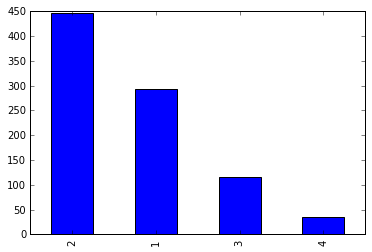

In [4]:
df['budget'].value_counts().plot(kind='bar')

#### Growth rate

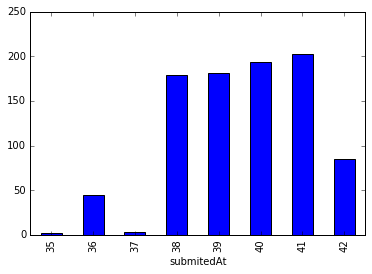

In [5]:
df["submitedAt"].groupby(df["submitedAt"].dt.week).count().plot(kind="bar")

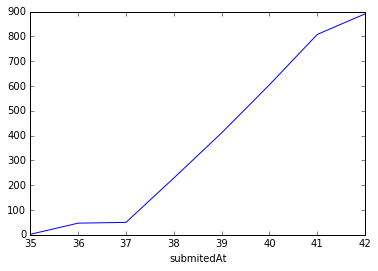

In [6]:
# week_start = df['submitedAt'].dt.to_period('W').apply(lambda r: r.start_time)
# week_end = df['submitedAt'].dt.to_period('W').apply(lambda r: r.end_time)

# print week_end - week_start

week_count = df["submitedAt"].groupby(df["submitedAt"].dt.week).count()

week_total_count = pd.rolling_sum(week_count,window =7,min_periods=0)
week_total_count.plot()

submitedAt
35    1.000000
36    0.957447
37    0.060000
38    0.781659
39    0.442822
40    0.320661
41    0.251238
42    0.095398
dtype: float64


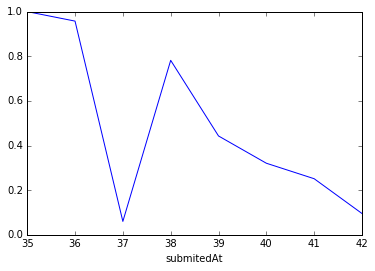

In [7]:
growth_rate = week_count / week_total_count
print growth_rate
growth_rate.plot()

#### Churn Rate

In [8]:
# sample
def random_dates(start, end, n=100):
    start_u = start.value//10**9
    end_u = end.value//10**9

    return pd.DatetimeIndex((10**9*np.random.randint(start_u, end_u, n)).view('M8[ns]'))

n = 1000
start = pd.to_datetime('2018-01-01')
end = pd.to_datetime('2018-12-01')

In [9]:
datesUnsub = random_dates(start, end, n)
dates_new_users = random_dates(start, end, n * 10)

unsub_sample = pd.DataFrame({
    '_id': [''] * n,
    'product': [None] * n,
    'look': [None] * n,
    'event': ['UNSUBSCRIBE_CLICK'] * n,
    'user': [''] * n,
    'createdAt': datesUnsub,
    'updatedAt': datesUnsub,   
})

# np.random.randint(1,4,size=n*10)

new_user_sample = pd.DataFrame({ 
    '_id': [''] * n * 10,
     'email': [''] * n * 10,
     'budget': [''] * n * 10,
     'typeformID': [''] * n * 10,
     'dob': [''] * n * 10,
     'name': [''] * n * 10,
     'startedAt': dates_new_users,
     'submitedAt': dates_new_users 
})

unsub_sample.head()

,_id,createdAt,event,look,product,updatedAt,user
0,,2018-07-20 09:52:43,UNSUBSCRIBE_CLICK,None,None,2018-07-20 09:52:43,
1,,2018-04-03 04:35:22,UNSUBSCRIBE_CLICK,None,None,2018-04-03 04:35:22,
2,,2018-09-20 12:49:24,UNSUBSCRIBE_CLICK,None,None,2018-09-20 12:49:24,
3,,2018-08-29 09:51:26,UNSUBSCRIBE_CLICK,None,None,2018-08-29 09:51:26,
4,,2018-09-10 01:56:46,UNSUBSCRIBE_CLICK,None,None,2018-09-10 01:56:46,


In [10]:
new_user_sample.head()

,_id,budget,dob,email,name,startedAt,submitedAt,typeformID
0,,,,,,2018-05-24 16:32:58,2018-05-24 16:32:58,
1,,,,,,2018-11-03 10:31:05,2018-11-03 10:31:05,
2,,,,,,2018-05-29 19:37:13,2018-05-29 19:37:13,
3,,,,,,2018-05-28 17:55:51,2018-05-28 17:55:51,
4,,,,,,2018-09-25 04:18:00,2018-09-25 04:18:00,


In [11]:
df.head()

,_id,budget,dob,email,name,startedAt,submitedAt,typeformID
0,5bb442b6382e724314c10c1d,4,2018-09-19,cristianoark23@gmail.com,Dk,2018-09-19 21:43:43,2018-09-20 00:43:43,0b8512a54804c39fe0eb1a2b2d32760d
1,5b9ec43d29d9dd39090e1d90,3,1990-02-07,kayron.scabral@gmail.com,Kayron Cabral,2018-09-24 13:43:49,2018-09-24 16:43:49,58f02f39c4c2b4b993f89918969a9137
2,5bb442b4382e724314c10c1a,1,1995-10-18,emanuelfilipe678@gmail.com,Fkli,2018-09-26 16:46:49,2018-09-26 19:46:49,da189936f361ae933a01723cdedefbb7
3,5bb442b5382e724314c10c1b,2,1998-07-09,ygor_santos22k@hotmail.com,Ygor,2018-09-20 01:21:39,2018-09-20 04:21:39,e64df55870ca4bcf99931818044d8d99
4,5bb442b6382e724314c10c1c,2,1984-04-24,thiagopolitto@yahoo.com.br,Thiago,2018-09-19 22:01:43,2018-09-20 01:01:43,95e25a78cac5a58a8f7ddab1f7ba1e23


In [12]:
print new_user_sample.shape
print df.shape
df_sampled = pd.concat([df, new_user_sample])
df_sampled.head()

(10000, 8)
(893, 8)


,_id,budget,dob,email,name,startedAt,submitedAt,typeformID
0,5bb442b6382e724314c10c1d,4,2018-09-19,cristianoark23@gmail.com,Dk,2018-09-19 21:43:43,2018-09-20 00:43:43,0b8512a54804c39fe0eb1a2b2d32760d
1,5b9ec43d29d9dd39090e1d90,3,1990-02-07,kayron.scabral@gmail.com,Kayron Cabral,2018-09-24 13:43:49,2018-09-24 16:43:49,58f02f39c4c2b4b993f89918969a9137
2,5bb442b4382e724314c10c1a,1,1995-10-18,emanuelfilipe678@gmail.com,Fkli,2018-09-26 16:46:49,2018-09-26 19:46:49,da189936f361ae933a01723cdedefbb7
3,5bb442b5382e724314c10c1b,2,1998-07-09,ygor_santos22k@hotmail.com,Ygor,2018-09-20 01:21:39,2018-09-20 04:21:39,e64df55870ca4bcf99931818044d8d99
4,5bb442b6382e724314c10c1c,2,1984-04-24,thiagopolitto@yahoo.com.br,Thiago,2018-09-19 22:01:43,2018-09-20 01:01:43,95e25a78cac5a58a8f7ddab1f7ba1e23


In [13]:
print unsub_sample.shape
print dfClick.shape
dfClickSampled = pd.concat([unsub_sample, dfClick])
dfClickSampled.head()

(1000, 7)
(100, 7)


,_id,createdAt,event,look,product,updatedAt,user
0,,2018-07-20 09:52:43,UNSUBSCRIBE_CLICK,None,None,2018-07-20 09:52:43,
1,,2018-04-03 04:35:22,UNSUBSCRIBE_CLICK,None,None,2018-04-03 04:35:22,
2,,2018-09-20 12:49:24,UNSUBSCRIBE_CLICK,None,None,2018-09-20 12:49:24,
3,,2018-08-29 09:51:26,UNSUBSCRIBE_CLICK,None,None,2018-08-29 09:51:26,
4,,2018-09-10 01:56:46,UNSUBSCRIBE_CLICK,None,None,2018-09-10 01:56:46,


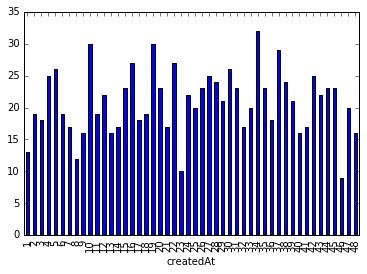

In [14]:
unsub = dfClickSampled[dfClickSampled['event'] == 'UNSUBSCRIBE_CLICK']
unsub["createdAt"].groupby(unsub["createdAt"].dt.week).count().plot(kind="bar")

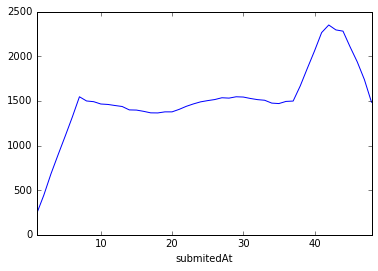

In [15]:
number_lost_week = unsub["createdAt"].groupby(unsub["createdAt"].dt.week).count()
start_period_week = df_sampled["submitedAt"].groupby(df_sampled["submitedAt"].dt.week).count()
start_period_week_total = pd.rolling_sum(start_period_week,window =7,min_periods=0)
start_period_week_total.plot()

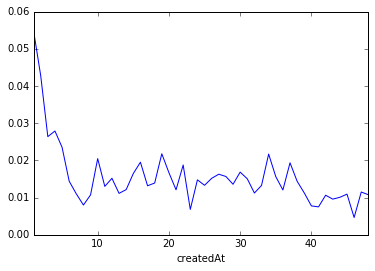

In [16]:
churn_rate = number_lost_week / start_period_week_total
churn_rate.plot()

# Speed Rate

34         NaN
35    0.984354
36    0.945399
37    0.040641
38    0.767271
39    0.431568
40    0.312890
41    0.243732
42    0.084760
dtype: float64


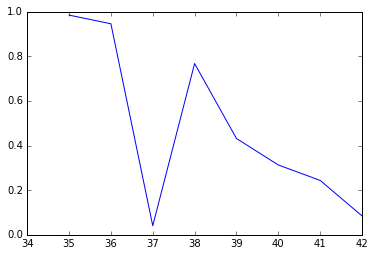

In [17]:
speed_rate = growth_rate - churn_rate[33:42]
print speed_rate
speed_rate.plot()

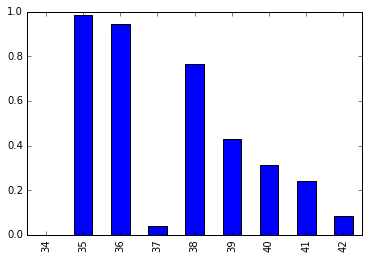

In [18]:
speed_rate.plot(kind='bar')